<a href="https://colab.research.google.com/github/jiyun126/-/blob/main/11%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%EB%AA%A8%EB%B2%94%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1번 문제
- convolution layer 2개
- fully connected layer 1개

## 라이브러리 호출

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


Instructions for updating:
non-resource variables are not supported in the long term


## 데이터 불러오기

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_x = train_x.reshape((-1, 28, 28, 1))
test_x = test_x.reshape((-1, 28, 28, 1))

## 커널 설정

In [ ]:
input_h = 28
input_w = 28
input_ch = 1

k1_h = 3
k1_w = 3
k1_ch = 32
p1_h = 2
p1_w = 2

k2_h = 3
k2_w = 3
k2_ch = 64
p2_h = 2
p2_w = 2

conv_result_size = 7 * 7 * 64
n_hidden = 100
n_output = 10

## 가중치 설정

In [ ]:
weights = {
    'conv1': tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1))
}

biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}

x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

## 모델 설계

In [ ]:
def net(x, weights, biases):
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1 + biases['conv1'])
    maxp1 = tf.nn.max_pool2d(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='SAME')

    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2 + biases['conv2'])
    maxp2 = tf.nn.max_pool2d(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='SAME')

    flatten = tf.reshape(maxp2, [-1, conv_result_size])
    fc1 = tf.nn.relu(tf.matmul(flatten, weights['hidden']) + biases['hidden'])
    output = tf.matmul(fc1, weights['output']) + biases['output']
    return output

## 하이퍼파라미터, 손실함수 설정

In [ ]:
LR = 0.0001
pred = net(x, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

## 학습

In [ ]:
n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

for epoch in range(n_iter):
    # 랜덤 배치 생성
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = to_categorical(train_y[batch_indices], num_classes=10)

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        # 테스트 데이터 배치
        test_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_indices]
        test_batch_y = to_categorical(test_y[test_indices], num_classes=10)

        train_loss = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        test_loss = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(train_loss)
        loss_record_test.append(test_loss)

        print("Iter : {}".format(epoch))
        print("Train Loss : {:.4f}".format(train_loss))
        print("Test Loss : {:.4f}".format(test_loss))

Iter : 0
Train Loss : 2.5821
Test Loss : 2.6152
Iter : 250
Train Loss : 0.3911
Test Loss : 0.5451
Iter : 500
Train Loss : 0.3723
Test Loss : 0.3824
Iter : 750
Train Loss : 0.2484
Test Loss : 0.2956
Iter : 1000
Train Loss : 0.1967
Test Loss : 0.2597
Iter : 1250
Train Loss : 0.0973
Test Loss : 0.1972
Iter : 1500
Train Loss : 0.1034
Test Loss : 0.0736
Iter : 1750
Train Loss : 0.3910
Test Loss : 0.3463
Iter : 2000
Train Loss : 0.0841
Test Loss : 0.1881
Iter : 2250
Train Loss : 0.0823
Test Loss : 0.1956


## 로스 시각화

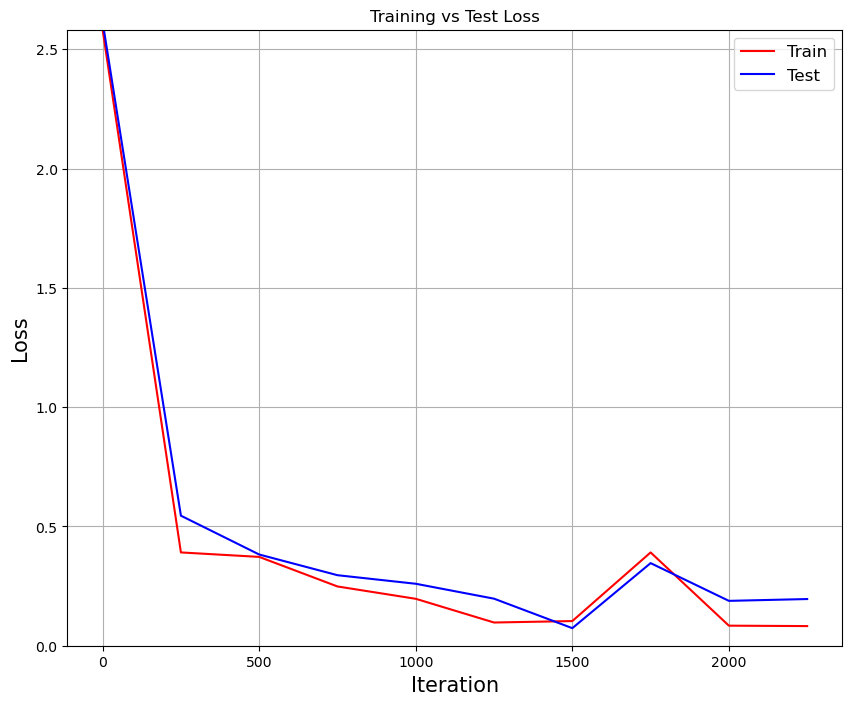

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record_train)) * n_prt, loss_record_train, 'r', label='Train')
plt.plot(np.arange(len(loss_record_test)) * n_prt, loss_record_test, 'b', label='Test')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=12)
plt.ylim([0, np.max(loss_record_train)])
plt.grid(True)
plt.title("Training vs Test Loss")
plt.show()

## 정확도 출력

In [ ]:
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 96.0


# 2번 문제
- convolution layer 3개
- fully connected layer 2개

## 라이브러리 호출

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## 데이터 불러오기

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_x = train_x.reshape((-1, 28, 28, 1))
test_x = test_x.reshape((-1, 28, 28, 1))

## 커널 설정

In [ ]:
input_h = 28
input_w = 28
input_ch = 1

k1_h = 3
k1_w = 3
k1_ch = 32
p1_h = 2
p1_w = 2

k2_h = 3
k2_w = 3
k2_ch = 64
p2_h = 2
p2_w = 2

k3_h = 3
k3_w = 3
k3_ch = 128
p3_h = 2
p3_w = 2

# FC1, FC2
conv_result_size = 4 * 4 * 128
n_hidden1 = 625
n_hidden2 = 100
n_output = 10

## 가중치 설정

In [ ]:
weights = {
    'conv1': tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev=0.1)),
    'conv3': tf.Variable(tf.random.normal([k3_h, k3_w, k2_ch, k3_ch], stddev=0.1)),
    'fc1': tf.Variable(tf.random.normal([conv_result_size, n_hidden1], stddev=0.1)),
    'fc2': tf.Variable(tf.random.normal([n_hidden1, n_hidden2], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_hidden2, n_output], stddev=0.1))
}

biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)),
    'conv3': tf.Variable(tf.random.normal([k3_ch], stddev=0.1)),
    'fc1': tf.Variable(tf.random.normal([n_hidden1], stddev=0.1)),
    'fc2': tf.Variable(tf.random.normal([n_hidden2], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}

x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)

## 모델 설계

In [ ]:
def net(x, weights, biases):
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1 + biases['conv1'])
    maxp1 = tf.nn.max_pool2d(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='SAME')

    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2 + biases['conv2'])
    maxp2 = tf.nn.max_pool2d(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='SAME')

    conv3 = tf.nn.conv2d(maxp2, weights['conv3'], strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3 + biases['conv3'])
    maxp3 = tf.nn.max_pool2d(conv3, ksize=[1, p3_h, p3_w, 1], strides=[1, p3_h, p3_w, 1], padding='SAME')

    flatten = tf.reshape(maxp3, [-1, conv_result_size])

    fc1 = tf.nn.relu(tf.matmul(flatten, weights['fc1']) + biases['fc1'])
    fc2 = tf.nn.relu(tf.matmul(fc1, weights['fc2']) + biases['fc2'])
    output = tf.matmul(fc2, weights['output']) + biases['output']
    return output

## 하이퍼파라미터, 손실함수 설정

In [ ]:
LR = 0.0001
pred = net(x, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

## 학습

In [ ]:
n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

for epoch in range(n_iter):
    idx = np.random.choice(train_x.shape[0], n_batch, replace=False)
    batch_x = train_x[idx]
    batch_y = to_categorical(train_y[idx], num_classes=10)

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        t_idx = np.random.choice(test_x.shape[0], n_batch, replace=False)
        test_batch_x = test_x[t_idx]
        test_batch_y = to_categorical(test_y[t_idx], num_classes=10)

        train_loss = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        test_loss = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(train_loss)
        loss_record_test.append(test_loss)

        print("Iter : {}".format(epoch))
        print("Train Loss : {:.4f}".format(train_loss))
        print("Test Loss : {:.4f}".format(test_loss))

Iter : 0
Train Loss : 4.4120
Test Loss : 3.5132
Iter : 250
Train Loss : 0.3958
Test Loss : 0.1863
Iter : 500
Train Loss : 0.1792
Test Loss : 0.2206
Iter : 750
Train Loss : 0.0409
Test Loss : 0.0759
Iter : 1000
Train Loss : 0.1597
Test Loss : 0.1787
Iter : 1250
Train Loss : 0.1996
Test Loss : 0.0767
Iter : 1500
Train Loss : 0.0347
Test Loss : 0.0929
Iter : 1750
Train Loss : 0.0773
Test Loss : 0.0593
Iter : 2000
Train Loss : 0.0364
Test Loss : 0.1101
Iter : 2250
Train Loss : 0.0517
Test Loss : 0.0376


## 로스 시각화

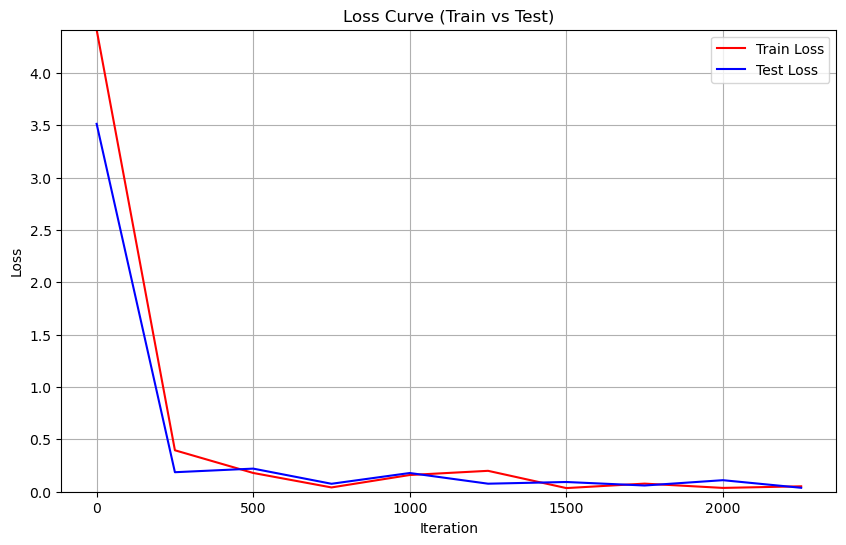

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(loss_record_train)) * n_prt, loss_record_train, 'r', label='Train Loss')
plt.plot(np.arange(len(loss_record_test)) * n_prt, loss_record_test, 'b', label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve (Train vs Test)')
plt.legend()
plt.grid(True)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

## 정확도 출력

In [ ]:
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 100.0


# 정확도 비교
- layer를 추가하면 정확도는 더 높아진다.
- 96 -> 100